# OPTICS

### LIBRARIES
* Execute this cell to import the libraries we need.

In [10]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

# PART 1
## WARMUP: HERON'S METHOD   

Iterative numerical solutions are core to computational science. We use them to find the minima of complicated functions, to simulate many-body problems, and for many other things.

### CODE
* Write two functions to approximate the square root of a number using Heron's method.
* The first should use three iterations.
* The second should use ten iterations. 
* Test each function using the numbers 10, 14, 27, and 81.

In [11]:
def square_root_3_iter(number):
    guess = number / 2
    for i in range(0,3):
        guess = (guess + number / guess) / 2
    return guess

In [12]:
def square_root_10_iter(number):
    guess = number / 2
    for i in range(0,10):
        guess = (guess + number / guess) / 2
    return guess

In [13]:
inputs = [10,27,81,2401]
for inp in inputs:
    print(f"input: {inp}")
    print(f"3 iterations: {square_root_3_iter(inp)}")
    print(f"10 iterations: {square_root_10_iter(inp)}")
    print()

input: 10
3 iterations: 3.162319422150883
10 iterations: 3.162277660168379

input: 27
3 iterations: 5.211913542366209
10 iterations: 5.196152422706632

input: 81
3 iterations: 9.497456198181656
10 iterations: 9.0

input: 2401
3 iterations: 155.27783620631706
10 iterations: 49.0



<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 2
## DISTANCE AND TIME FUNCTIONS   

Write functions for distance and time, which will be used to calculate the travel time of light through your media.

### CODE

In [14]:
#students should write these functions themselves
def distance(p1,p2):
    '''
    Accepts two points to create the displacement vector, p1 and p2.
    Returns , the magnitude of the displacement vector.
    This can either be a list or np.array
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    dist = np.linalg.norm(p1 - p2)
    #or something like
    dist = np.sqrt( (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 ) 
    return dist

In [15]:
def total_time(p1,p2,p3,v_1,v_2):
    '''
    accepts three points (vector): p1, p2, and p3, and two speeds (scalar): v_1 and v_2,
    where p2 is on the boundary surface of the media with phase velocities v_1 and v_2.
    '''
    p1 = np.array(p1)
    p2 = np.array(p2)
    p3 = np.array(p3)
    t1 = distance(p1,p2) / v_1
    t2 = distance(p2,p3) / v_2 
    travel_time = t1 + t2
    return travel_time

In [16]:
distance_test = [
    # input  | expected output
    (( [1.0,0.0],[0.0,1.0] ), np.sqrt(2)),
    (( [0.0,0.0],[1.0,0.0] ), 1),
    (( [0.0,0.0],[np.sqrt(3),1.0] ), 2) 
    # don't worry about small rounding errors!
]
for test_input, expected_output in distance_test:
    point1, point2 = test_input
    actual_output = distance(point1,point2)
    print(f"Expected output: {expected_output}")
    print(f"Actual output: {actual_output}")
    print()

Expected output: 1.4142135623730951
Actual output: 1.4142135623730951

Expected output: 1
Actual output: 1.0

Expected output: 2
Actual output: 1.9999999999999998



In [17]:
time_test = [
    #         input                     |  expected output
    (( [0.0,1.0],[0.5,0.5],[1.0,0.0],2,4 ),     0.5303),
    (( [0.0,1.0],[0.3,0.5],[1.0,0.0],3,5 ),     0.3664),
    (( [0.0,1.0],[0.7,0.5],[1.0,0.0],0.8,0.6 ), 2.0471) 
]
for test_input, expected_output in time_test:
    point1, point2, point3, speed1,speed2 = test_input
    actual_output = total_time(point1,point2,point3,speed1,speed2)
    print(f"Expected output: {expected_output}")
    print(f"Actual output: {actual_output}")
    print()

Expected output: 0.5303
Actual output: 0.5303300858899107

Expected output: 0.3664
Actual output: 0.36641156850236256

Expected output: 2.0471
Actual output: 2.0471159741878786



### SHORT RESPONSE QUESTIONS
1. Why is it important that we test our code?
### ANSWER

1. Yes, for the test set of points my functions give correct outputs.
2. We must test our code because it is very easy to make mistakes which might not be readily apparent when reading it.

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 3 
## PATH OF LEAST TIME   

In your answer to this question, include refraction plots at three different intersection X values. One of them should be reasonably close to the path of least time.
Following this, solve for the path of least time using the provided function and scipy.minimize_scalar().  

What do you notice about the angles made between the plane normal on each side of the boundary?   

How do you think these will change if we change the position of the top point? If we change the relative speeds of light between each medium?   


### GIVEN FUNCTIONS

In [18]:
def calculate_angles(p1,p2,p3): #through a line at x = 0.5
    vec_1 = p1 - p2
    intersection_line = [0,1]
    vec_1_norm = vec_1 / np.linalg.norm(vec_1)
    angle_between_1 = np.arccos(np.dot(vec_1_norm, intersection_line))

    vec_2 = p3 - p2
    intersection_line = [0,-1]
    vec_2_norm = vec_2 / np.linalg.norm(vec_2)
    angle_between_2 = np.arccos(np.dot(vec_2_norm, intersection_line))
    
    return angle_between_1,angle_between_2

In [19]:
from matplotlib.patches import Arc

def light_travel_plot(p1,p2,p3,incident_angle,refractive_angle,v1=1.0,v2=0.8,travel_time=1.0): #give them this function
    x = np.array([p1[0],p2[0],p3[0]])
    y = np.array([p1[1],p2[1],p3[1]])

    #draw points connecting lines
    plt.scatter(x,y)
    plt.plot(x, y, linestyle='-', color='red')

    plt.xlim(-0.1,1.1) 
    plt.ylim(0,1)
    #fill medium below interface
    plt.axhspan(0, p2[1], color='gray', alpha=0.5)

    #calculate normal vector at interface
    incident_norm = np.array([0,0.5]) 
    refractive_norm = np.array([0,-0.5]) 
    
    plt.quiver(p2[0], p2[1], incident_norm[0], incident_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)

    plt.quiver(p2[0], p2[1], refractive_norm[0], refractive_norm[1],
               angles='xy', scale_units='xy', scale=0.1, color='blue', label='Normal',
              alpha = 0.3)
    
    arc = Arc(p2,0.3,0.3,theta1=90,theta2=90+np.degrees(incident_angle),color='green')
    plt.gca().add_patch(arc)
    
    arc = Arc(p2,0.3,0.3,theta1=270,theta2=270+np.degrees(refractive_angle),color='green')
    plt.gca().add_patch(arc)

    plt.text(p2[0] + 0.01, p2[1] + 0.15, f'{np.degrees(incident_angle):.1f}°', color='black')
    plt.text(p2[0] - 0.08, p2[1] - 0.15, f'{np.degrees(refractive_angle):.1f}°', color='black')

    plt.text(p2[0] - 0.25,p2[1] + 0.25, f'$v_1 = {v1}$',color = 'black',fontsize='large')
    plt.text(p2[0] - 0.25,p2[1] - 0.25, f'$v_2 = {v2}$', color = 'black',fontsize='large')

    plt.text(0.05,0.60,f't = {travel_time:.4f}',color = 'red',fontsize='large')
    
    plt.show()

In [20]:
def calculate_and_plot(top_x,mid_x,low_x,v1,v2):
    p1 = np.array([top_x,1])
    p2 = np.array([mid_x,0.5])
    p3 = np.array([low_x,0])
    angles = calculate_angles(p1,p2,p3)
    time = total_time(p1,p2,p3,v_1,v_2)
    light_travel_plot(p1,p2,p3,*angles,v_1,v_2,time) #the difference
    return (angles[0],angles[1],time)

In [21]:
def calculate_only(mid_x,v1,v2):
    p1 = np.array([top_x,1])
    p2 = np.array([mid_x,0.5])
    p3 = np.array([low_x,0])
    angles = calculate_angles(p1,p2,p3)
    time = total_time(p1,p2,p3,v_1,v_2)
    return (angles[0],angles[1],time)

In [22]:
def travel_time_function(top_x,low_x,v1,v2):
    def calculate_time(mid_x):
        p1 = np.array([top_x,1])
        p2 = np.array([mid_x,0.5])
        p3 = np.array([low_x,0])
        return float(total_time(p1,p2,p3,v1,v2))
    return calculate_time

### TEST MIDPOINTS MANUALLY

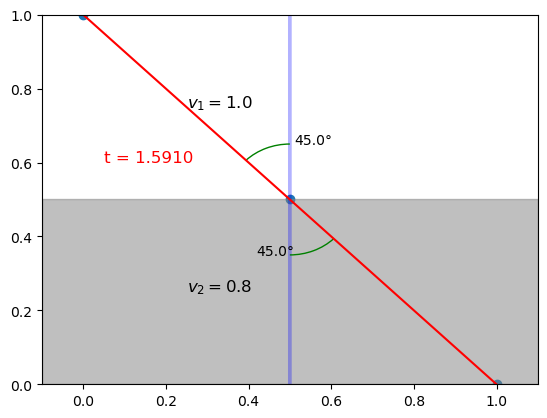

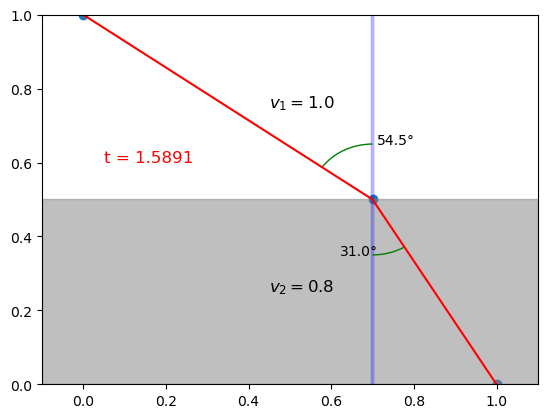

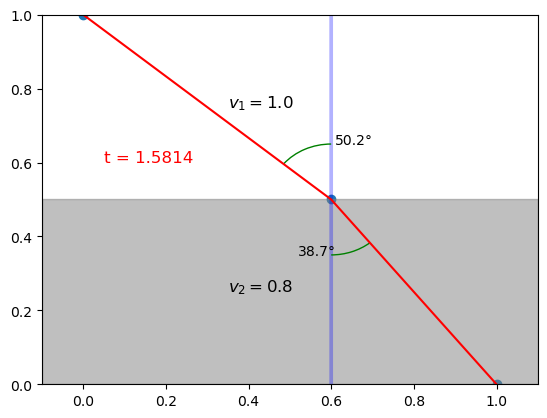

In [23]:
top_x = 0.0
low_x = 1.0
v_1 = 1.0
v_2 = 0.8

mid_x = 0.5
data =calculate_and_plot(top_x,mid_x,low_x,v_1,v_2) 
mid_x = 0.7
data =calculate_and_plot(top_x,mid_x,low_x,v_1,v_2) 
mid_x = 0.6
data =calculate_and_plot(top_x,mid_x,low_x,v_1,v_2) 

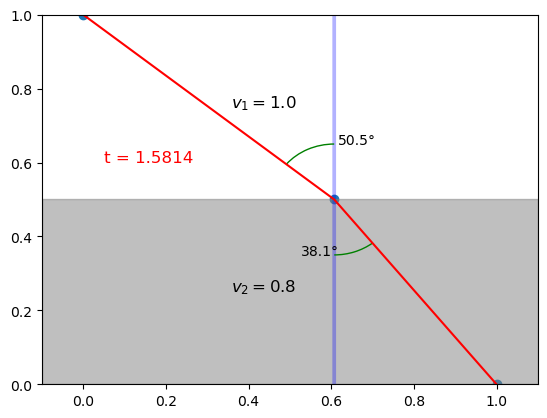

OPTIMAL MIDPOINT X VALUE: 0.6073433271744554


In [24]:
one_var_function = travel_time_function(top_x,low_x,v_1,v_2)
data = scipy.optimize.minimize_scalar(one_var_function) #this is the function we imported!
best_x = data['x']
data = calculate_and_plot(top_x,best_x,low_x,v_1,v_2)
print(f"OPTIMAL MIDPOINT X VALUE: {best_x}")

### SHORT RESPONSE

The angle on the top, where the speed of light is faster, is larger than the angle inside the medium where it is slower.  

This relationship will likely stay the same regardless of the positions of the two points, unless they are right on top of each other.   

As the speeds of light get more different, the difference in angle will get larger. If light were slower in the top medium, the top angle would be smaller than the bottom angle.

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 4 
### EXPRESSION FOR ANGLES  
  
Obtain refraction plots and associated angles for the path of least time for several different starting positions of the top point.  

Plot refracted versus incident angle.  
Also plot sin(refracted) versus sin(incident).
Is there any obvious relationship yet?

Use plot_snell_lines() to check sin(refracted) versus sin(incident) for several combinations of refractive indices for the two media.   
Write a formula, in the form y = m * x + b , relating sin(refracted), sin(incident), v(medium 1), and v(medium 2).

### GIVEN FUNCTIONS

In [33]:
from scipy.stats import linregress

def plot_snell_lines(v1_v2_pairs):
    """
    Overlay sin(Theta_r) vs sin(Theta_i) for multiple (v_1, v_2) pairs.
    """
    slopes = []
    ratios = []
    plt.figure(figsize=(8, 6))
    
    for v_1, v_2 in v1_v2_pairs:
        inc, ref = theta_vals(v_1, v_2,plot=False)
        sin_inc = np.sin(inc)
        sin_ref = np.sin(ref)
        slope, intercept, _, _, _ = linregress(sin_inc, sin_ref)
        slopes.append(slope)
        ratios.append(v_2 / v_1)
        
        plt.plot(sin_inc, sin_ref, label=f"$v_1$={v_1}, $v_2$={v_2}, slope={slope:.2f}")
    
    # Customize plot
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title("sin(Θ_r) vs. sin(Θ_i)")
    plt.xlabel('sin(Θ_i)')
    plt.ylabel('sin(Θ_r)')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()
    
    # Plot slope vs ratio
    plt.figure(figsize=(8, 6))
    slope_vs_ratio = linregress(ratios, slopes)
    plt.plot(ratios, slopes, 'o', label=f"Slope = {slope_vs_ratio.slope:.2f}x + {slope_vs_ratio.intercept:.2f}")
    plt.plot(ratios, slope_vs_ratio.intercept + slope_vs_ratio.slope * np.array(ratios), '-', color='red')
    
    # Customize plot
    plt.title("Slopes vs. Velocity Ratio (v_1/v_2)")
    plt.xlabel("Velocity Ratio ($v_1/v_2$)")
    plt.ylabel("Slope of sin(Θ_r) vs. sin(Θ_i)")
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

In [34]:
def theta_vals(v_1,v_2,plot=True):
    p1_x_vals = np.linspace(0.0,1.0,6)
    inc_angles = []
    ref_angles = []
    for p1_x in p1_x_vals:
        p1 = np.array([p1_x,1.0])
        p3 = np.array([1.0,0.0])
        best_x = scipy.optimize.minimize_scalar(travel_time_function(p1,p3,v_1,v_2))['x']
        p2 = np.array([best_x,0.5])
        if plot:
            inc_angle, ref_angle, time = calculate_and_plot(p1,p2,p3,v_1,v_2)
        else:
            inc_angle, ref_angle, time = calculate_only(p1,p2,p3,v_1,v_2)
        inc_angles.append(inc_angle)
        ref_angles.append(ref_angle)
    return inc_angles,ref_angles

### INPUTS AND OUTPUTS

In [35]:
v_1 = 1.0
v_2 = 0.8
inc_angles, ref_angles = theta_vals(v_1,v_2,plot=True)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [36]:
plt.plot(inc_angles,ref_angles)
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'Incident Angle vs. Refracted Angle ($\eta$ = {1/v_2})')
plt.xlabel('Incident Angle (radians)')
plt.ylabel('Refracted Angle (radians)')
plt.show()

NameError: name 'inc_angles' is not defined

In [ ]:
plt.plot(np.sin(inc_angles),np.sin(ref_angles))
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f'sin($\Theta{{}}_r$) vs. sin($\Theta{{}}_i$) ($\eta$ = {1/v_2})')
plt.xlabel('sin($\Theta_i$)')
plt.ylabel('sin($\Theta_r$)')
plt.show()

In [ ]:
# Example combinations of v_1 and v_2
v1_v2_pairs = [(1.0, 0.4), (1.0, 0.6), (1.0, 0.8), (1.0,1.0), (0.8, 1.0), (0.6,1.0), (0.4,1.0)]
plot_snell_lines(v1_v2_pairs)

### SHORT RESPONSE

FORMULA FOR ANGLES:  
$sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 5
## SNELL'S LAW

This expression, which we derived from scratch, is equivalent to Snell's Law!  

Prove this using algebra.

Definition of Refractive Index:   
$\eta_{med} = \frac{c}{v_{med}}$   
Snell's Law:  
$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$  

Does it surprise you that we were able to find this expression only through first principles? Do you know of any other examples of emergent behavior like this?

### MATH RESPONSE


$\eta_r \cdot sin(\theta_r) = \eta_i \cdot sin(\theta_i)$  
$\frac{c}{v_r} \cdot sin(\theta_r) = \frac{c}{v_i} \cdot sin(\theta_i)$  
$sin(\theta_r) = \frac{v_r}{c} \cdot \frac{c}{v_i} \cdot sin(\theta_i)$  
$sin(\theta_r) = \frac{v_r}{v_i} \cdot sin(\theta_i)$

### SHORT RESPONSE



It is interesting but not surprising that this should happen.  
Another example of emergent behavior is the gas laws coming from the combined action of many, many individual gas particles obeying Newton's laws.

<br/><br/>
<br/><br/>
<!--  -->

# PART 2:  WAVES

### LIBRARIES

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 6  
Fit curves to the points taken for the first, second, and third harmonics of the vibrating string.  
What values do you obtain for wavelength, wavenumber, and angular frequency for each?  
Plot wavenumber and angular frequency versus harmonic number.  
Find a relationship between the harmonic number and the wavenumber.
Are these angular wavenumber and frequency values or normal ones?

### GIVEN FUNCTIONS

In [33]:
def standing_wave(x_t,A, k, w , p1 , p2): #this function they write themselves, given a formula
    x,t = x_t
    return A * np.sin(k * x + p1) * np.cos(w * t + p2)
    
def surface_standing_wave(A,k,w,p1,p2): #this function is provided for them
    x = np.linspace(0,10,100)
    t = np.linspace(0,0.2,100)
    X, T = np.meshgrid(x, t)  # Create a grid
    Y = standing_wave((X,T),A,k,w,p1,p2)
    return X, T, Y

In [34]:
def plot_wave(x,y,t):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, t, y, color='red', s=5, label='Data Points')
    
    ax.set_zlim(-2, 2)
    ax.set_xlabel('Length')
    ax.set_ylabel('Time')
    ax.set_zlabel('Height')

    plt.show()

In [35]:
def plot_wave_with_surface(x,y,t,params): #this function is given to them
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if type(params) is dict:
        params = list([params['A'],params['k'],params['w'],params['p1'],params['p2']])
    # Normalize the time data to [0, 1] for color mapping

    X,T,Y = surface_standing_wave(*params)
    
    time_norm = (T - T.min()) / (T.max() - T.min())
    
    # Get the colormap
    cmap = plt.get_cmap('viridis')
    colors = cmap(time_norm)  # Map normalized time to colors
    
    # Plot the surface with custom facecolors based on time
    ax.plot_surface(X, T, Y, facecolors=colors, rstride=1, cstride=1, alpha=0.4)
    
    ax.scatter(x, t, y, color='red', s=5, label='Data Points')
    
    ax.set_zlim(-2, 2)
    ax.set_xlabel('Length')
    ax.set_ylabel('Time')
    ax.set_zlabel('Height')

    plt.show()

### LOAD AND PLOT WAVE DATA

In [36]:
data_1 = pd.read_csv('1st_harm.csv')
data_2 = pd.read_csv('2nd_harm.csv')
data_3 = pd.read_csv('3rd_harm.csv')

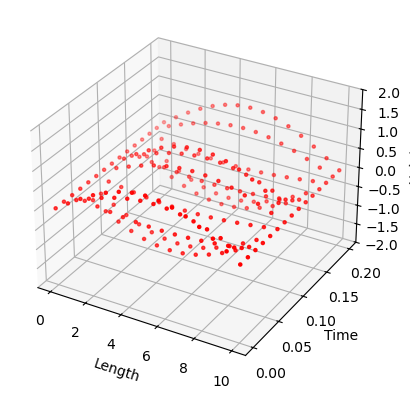

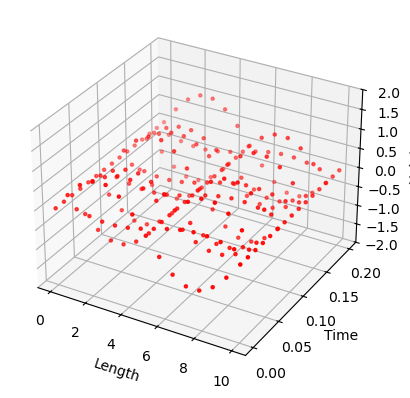

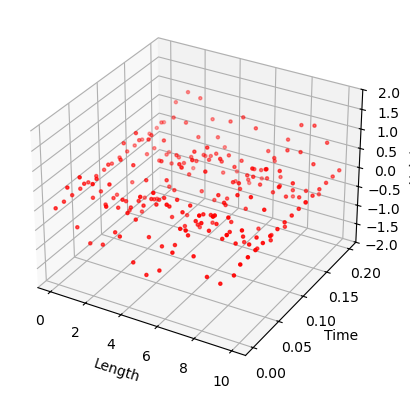

In [37]:
plot_wave(data_1['length'],data_1['height'],data_1['time'])
plot_wave(data_2['length'],data_2['height'],data_2['time'])
plot_wave(data_3['length'],data_3['height'],data_3['time'])

### FIT WAVE DATA TO CURVE

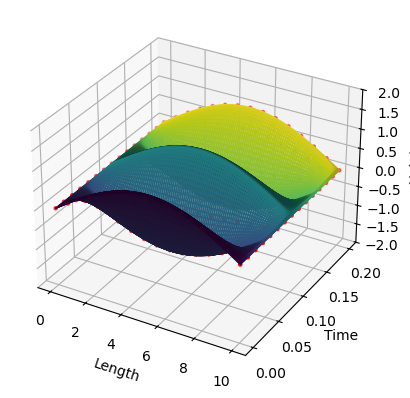

In [43]:
initial_guess = [1,0.5,0.5,0,0] 
params, covariance = curve_fit(standing_wave,(data_1['length'],data_1['time']),data_1['height'],p0=initial_guess)
plot_wave_with_surface(data_1['length'],data_1['height'],data_1['time'],params)

k_1 = params[1]
w_1 = params[2]

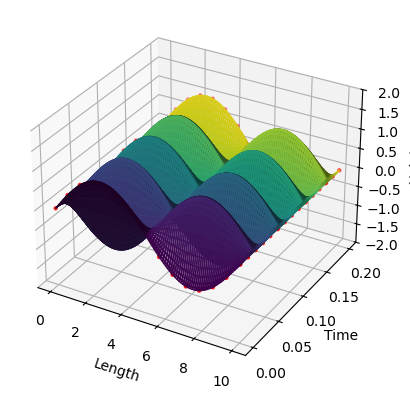

In [44]:
#something went wrong there. 
initial_guess = [2, 0.4, 100, 0, 1] #the good coefficients we found manually
params, covariance = curve_fit(standing_wave,(data_2['length'],data_2['time']),data_2['height'],p0=initial_guess)
plot_wave_with_surface(data_2['length'],data_2['height'],data_2['time'],params)
k_2 = params[1]
w_2 = params[2]

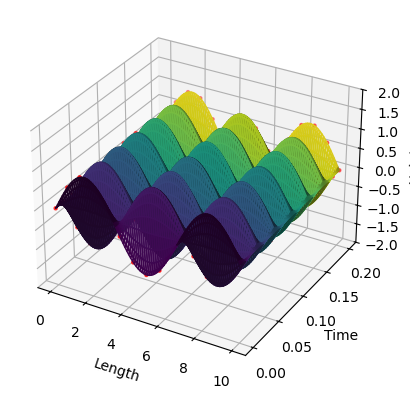

In [45]:
#something went wrong there. 
initial_guess = [6, 0.4, 200, 0, 1] #the good coefficients we found manually
params, covariance = curve_fit(standing_wave,(data_3['length'],data_3['time']),data_3['height'],p0=initial_guess)
plot_wave_with_surface(data_3['length'],data_3['height'],data_3['time'],params)

k_3 = params[1]
w_3 = params[2]

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 7  
Plot the wavenumbers and standing waves versus harmonic number.  
Write an expression for the wavenumbers of a standing wave on this string.  
Does this show that there are only certain allowed wavenumbers / wavelengths?
How do these differ?

### CODE

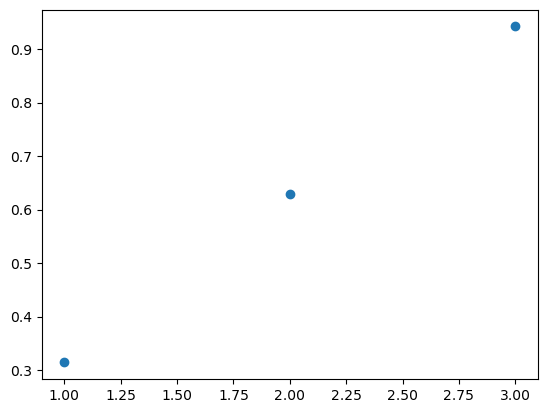

k = n * 0.314159


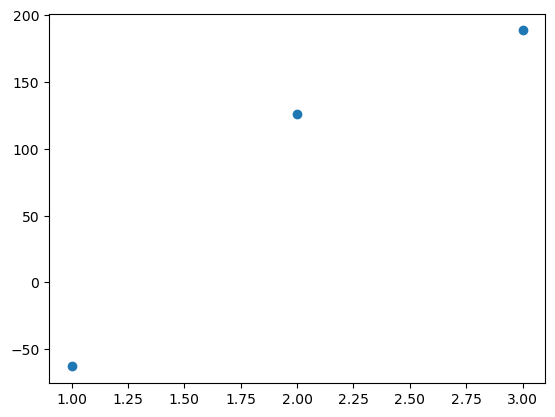

w = n * 125.663706
v_string = 200.00000038389288


In [46]:
v = w_1 / k_1
x = [1,2,3]
y_k = [k_1,k_2,k_3]
#let's make a plot_with_intercept function
plt.scatter(x,y_k)
plt.show()
slope, intercept = np.polyfit(x,y_k,1)
print(f"k = n * {slope:3f}")
y_w = [w_1,w_2,w_3]
plt.scatter(x,y_w)
plt.show()
slope, intercept = np.polyfit(x,y_w,1)
print(f"w = n * {slope:3f}")
print(f"v_string = {abs(w_1/k_1)}")

### SHORT RESPONSE

k = n * 0.314159  
w = n * 125.663706  
v_string = 200  
Yes, this shows that there are only certain standing waves allowed to exist,  
with their values of k and w given by their harmonic number.  
They differ only by the number of nodes.  

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 8  
Let's explore standing waves on a 3D spherical surface, instead of a 1D string.  
Using the provided function plot_spherical_harmonic(l,m),  
(credit: https://github.com/DalInar/schrodingers-snake)  
explore different combinations of integer inputs.  
Where do you recognize these shapes from?  
These are not quite what you recognize -  
there is one more degree of freedom for those. What is it?  

### GIVEN FUNCTIONS

In [2]:
from scipy.special import sph_harm
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.colors as mcolors

def plot_spherical_harmonic(l,m):
    '''
    adapted from code at https://github.com/DalInar/schrodingers-snake
    '''
    thetas = np.linspace(0, np.pi, 20)
    phis = np.linspace(0, 2*np.pi, 20)
    
    (Theta,Phi)=np.meshgrid(thetas,phis) 
    s_harm=sph_harm(m, l, Phi, Theta)
       
    R = abs(s_harm.real) #modified this to show only real part of spherical harmonic, to make connection to atomic orbitals more explicit
    X = R * np.sin(Theta) * np.cos(Phi)
    Y = R * np.sin(Theta) * np.sin(Phi)
    Z = R * np.cos(Theta)

    vmin = -1
    vmax = 1
    cmap = plt.get_cmap('jet')
    norm = mcolors.Normalize(vmin=Z.min(), vmax=Z.max())
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),facecolors=cmap(norm(R)),
        linewidth=0, antialiased=False, alpha=0.4)
    plt.title(r'Real Part of Spherical Harmonics, $Y_l^m(\theta,\phi)$'+r', $l=$'+str(l)+r', $m=$'+str(m))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.ylabel(r'$z$')
    
    plt.show()

### PLOT SPHERICAL HARMONICS

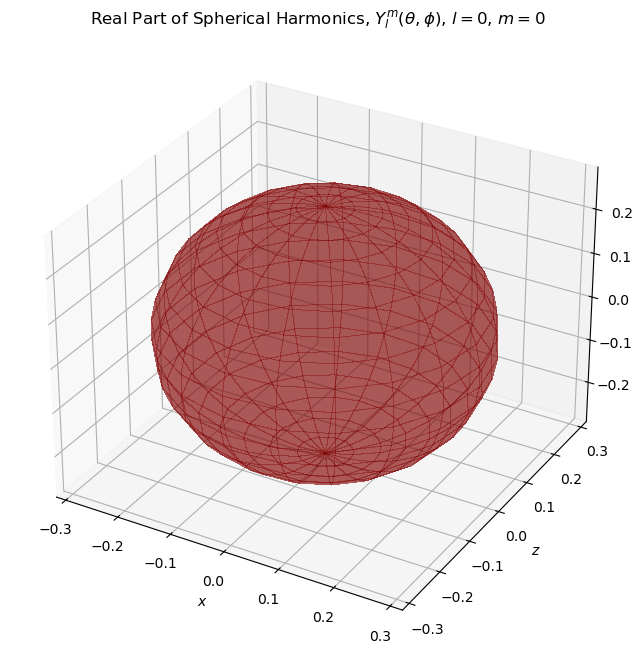

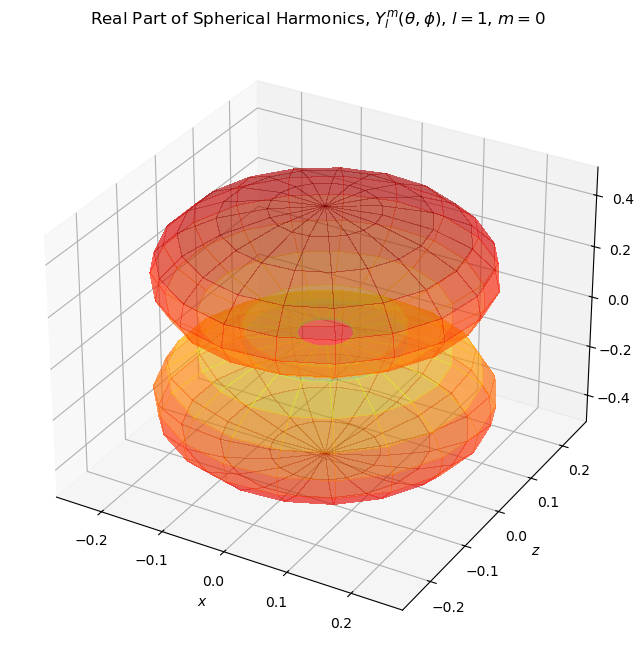

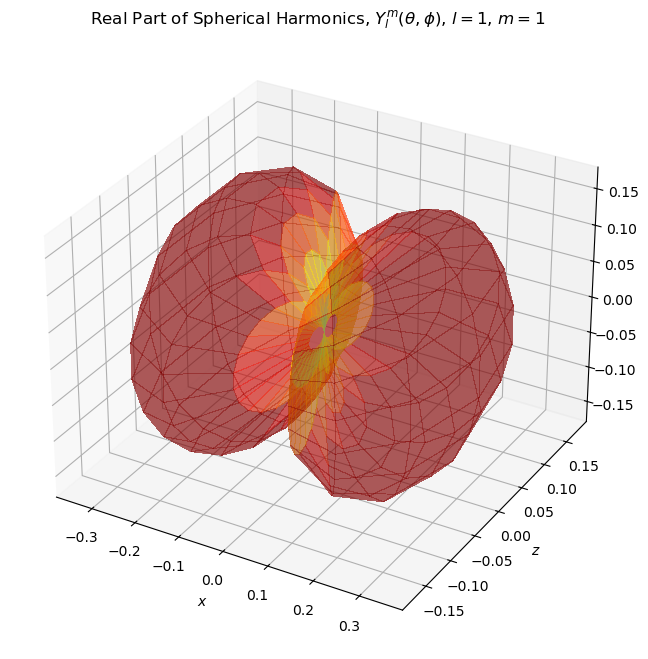

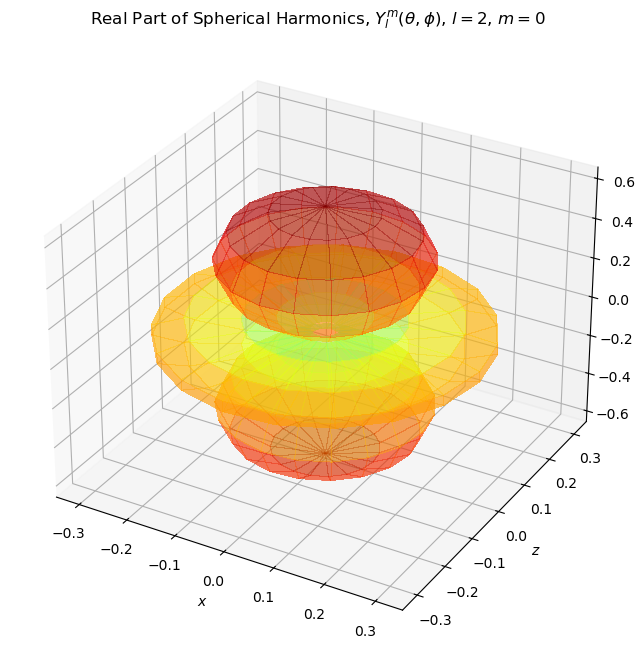

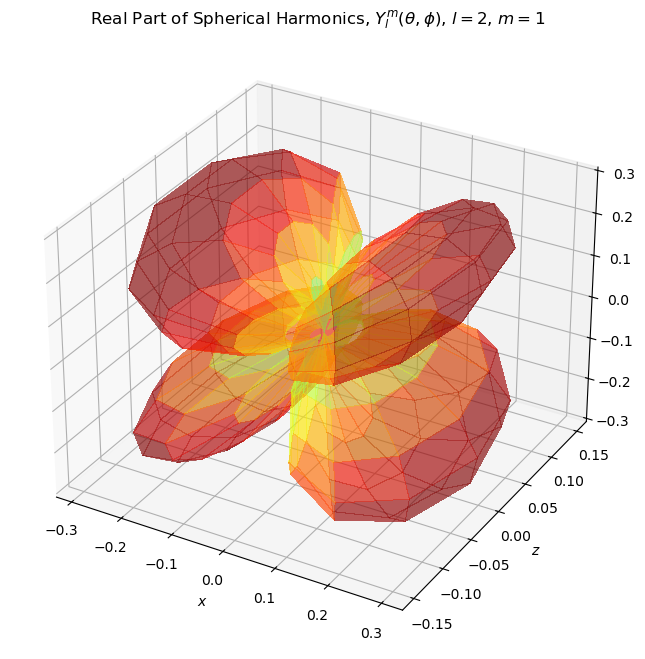

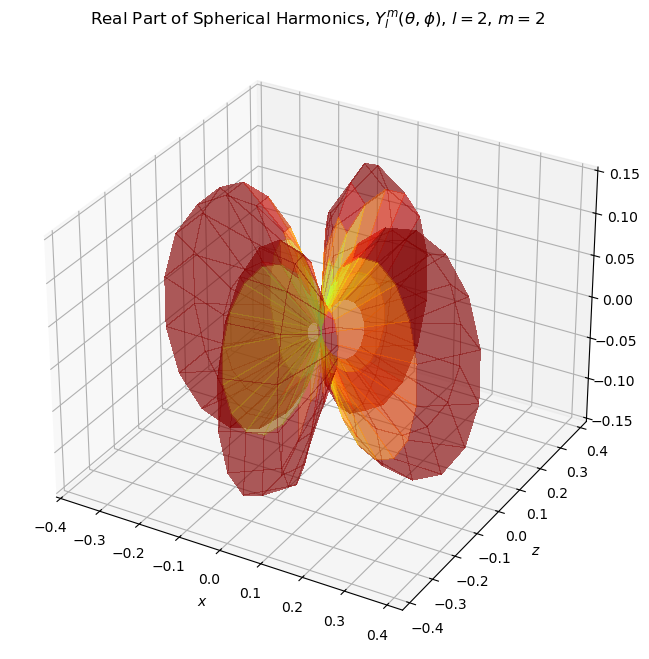

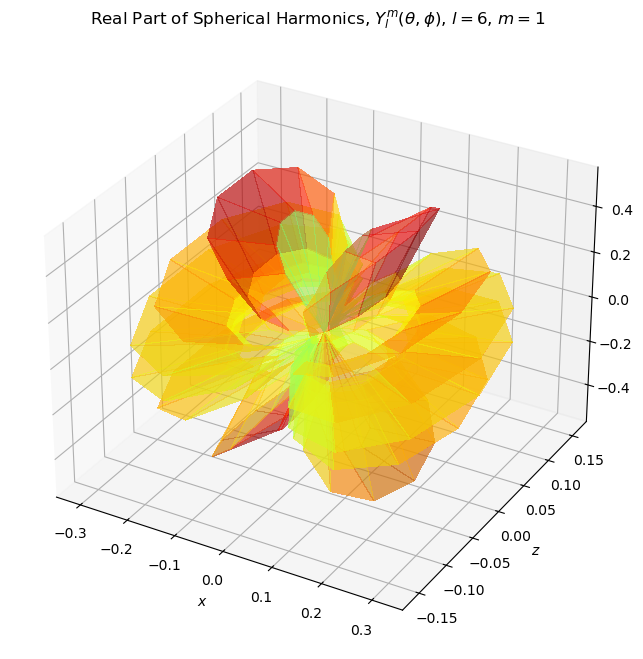

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plot_spherical_harmonic(0,0)
plot_spherical_harmonic(1,0)
plot_spherical_harmonic(1,1)
plot_spherical_harmonic(2,0)
plot_spherical_harmonic(2,1)
plot_spherical_harmonic(2,2)
plot_spherical_harmonic(6,1)

### SHORT RESPONSE

These are recognizable as the shapes of the s, p, and d atomic orbitals!

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 9  
We are missing a degree of freedom from the spherical harmonics; we cannot yet describe all the atomic orbitals.  
What is this missing degree of freedom?

### SHORT RESPONSE

The missing degree of freedom is the radial component of the electron density that depends on distance from the nucleus and not on the angular coordinates of the sphere.

<br/><br/>
<br/><br/>
<!--  -->

# QUESTION 10  
As we have seen, the orbitals take only certain possible shapes.  
Each orbital has an associated energy level.  
How does this explain the thin bands in atomic spectra?  

### SHORT RESPONSE

Because there are only certain possible shapes of the atomic orbitals, there are also only certain possible energies.
Spectra show transitions between energy levels, and there are finitely many, hence the thin bands.